# Task 1 - Get Organized

## Problem of this dataset

+ Age field of some people are empty string - This means if we want to work with any analysis that uses age, we should skip these rows
+ Ticket field of every row is not in the same format - We can remove alphabet and left only number -> See code below




In [26]:
## code to remove alphabet from ticket field 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

PLOT_DIM = (6,6)


passengers = pd.read_csv("titanic_data.csv")

def remove_alp(row):
    # clean up ticket
    ticket_name = row.loc["Ticket"]
    ticket_name_arr = ticket_name.split()
    if(len(ticket_name_arr) >=2):
        ticket_name = ticket_name_arr [len(ticket_name_arr)-1]
    row.loc["Ticket"] =  ticket_name
    # set cabin = -
    if(pd.isnull(row.loc["Cabin"])):
        row.loc["Cabin"] = "-"
    return row
passengers.apply(remove_alp,axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,-,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,-,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,-,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,-,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,-,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,-,C


# Task 2 - Analyse Data 


## 1. What shoud be the factor for passengers to survive?

If we talked about Titanic, the first thing that I want to know is what is the information relating to survival rate.

### 1.1. What is the average age of survivors. Find mean age of survive passengers

By default, I think that the more older, the higher rate of non-survive. That's why I want to find the mean of survivors and non-survivors first. The function describe is suitable for this job and it give more idea on the information

In [7]:

## for analysis with age

#passengers_ignore_empty_age = passengers.dropna(subset=['Age'])
# If use dropna, some rows will disappear and the rows will be excluded by some analysis

passengers_ignore_empty_age = passengers.fillna(method='pad')

passengers_ignore_empty_age.groupby("Survived")["Age"].describe()

Survived       
0         count    549.000000
          mean      30.334390
          std       14.053473
          min        0.750000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    342.000000
          mean      28.373070
          std       15.268221
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       38.000000
          max       80.000000
Name: Age, dtype: float64

**Conclusion** : Looking from the mean, mean of non-survivors is 30.3 and mean of survivors 28.3

### 1.2. What is the  number of Survived passengers ?

I would like to see the number of survivors and non-survivors compare to each other. It is very interesting to know that how many people survive from the accident.

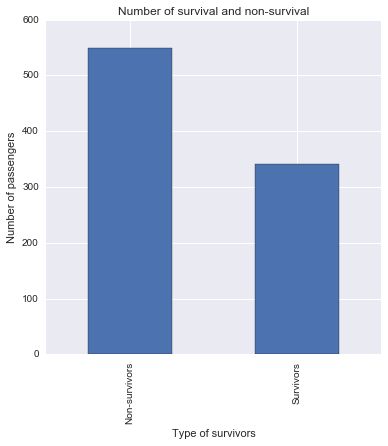

In [27]:
survived = passengers.groupby('Survived').size()
survived.index = ['Non-survivors', 'Survivors']
ax = survived.plot(kind='bar',title='Number of survival and non-survival', figsize= PLOT_DIM)
ax.set_xlabel("Type of survivors")
ax.set_ylabel("Number of passengers")

**conclusion** : Non-survivors are more than survivors

### 1.3. Does the class of passengers related to servivor rate ->Number of Survived passengers group by Class

In the movie, the classes of passengers are quite different in location and safety. I would like to know that the type of classes relate to any survival rate. And it would be good if I can see in in percent rate

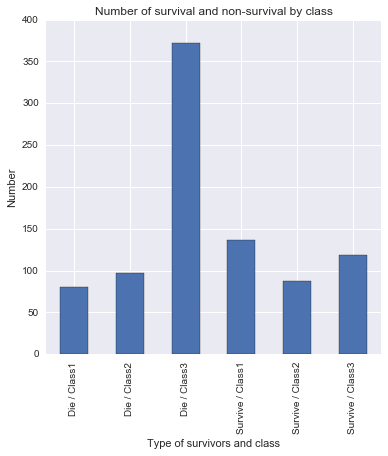

In [28]:
passenger_by_survived_class = passengers.groupby(['Survived','Pclass'])
survived_number = passenger_by_survived_class.size() 
survived_number.index = ['Die / Class1','Die / Class2','Die / Class3', 'Survive / Class1','Survive / Class2','Survive / Class3']
plot_survived_number = survived_number.plot(kind='bar',title='Number of survival and non-survival by class', figsize= PLOT_DIM)
plot_survived_number.set_xlabel("Type of survivors and class")
plot_survived_number.set_ylabel("Number")

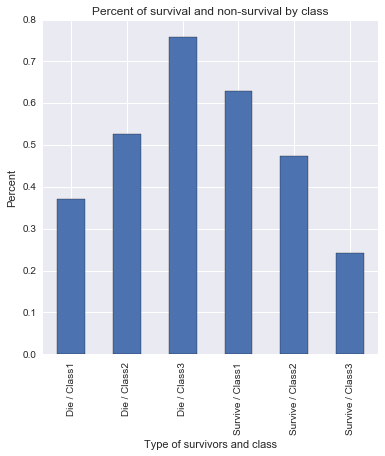

In [29]:
survived_percent = passenger_by_survived_class.size() / passengers.groupby(['Pclass']).size()
survived_percent.index = ['Die / Class1','Die / Class2','Die / Class3', 'Survive / Class1','Survive / Class2','Survive / Class3']
survived_percent.index.names = ['']
plot_survived_percent = survived_percent.plot(kind='bar',title='Percent of survival and non-survival by class', figsize= PLOT_DIM)
plot_survived_percent.set_xlabel("Type of survivors and class")
plot_survived_percent.set_ylabel("Percent")

conclusion : Class 3 has more chance to die, then class 2 and class 1.

### 1.4. Does the sex of passengers related to servivor rate -> Number of Survived passengers group by Sex

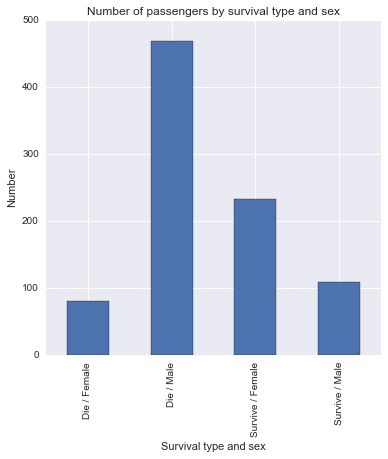

In [38]:
survived_passenger_sex = passengers.groupby(['Survived','Sex']).size()
survived_passenger_sex.index = ['Die / Female','Die / Male','Survive / Female','Survive / Male']
plot_survived_passenger_sex = survived_passenger_sex.plot(kind='bar', title = 'Number of passengers by survival type and sex', figsize= PLOT_DIM)
plot_survived_passenger_sex.set_xlabel("Survival type and sex")
plot_survived_passenger_sex.set_ylabel("Number")

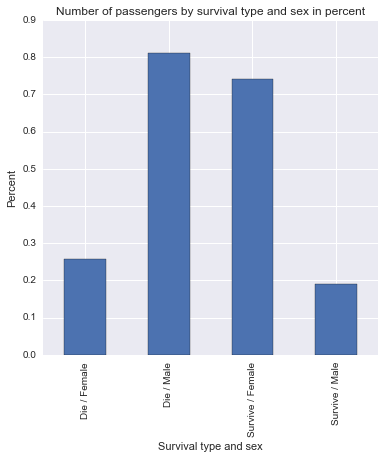

In [37]:
survived_passenger_sex_percent = passengers.groupby(['Survived','Sex']).size()
passenges_sex_percent = survived_passenger_sex_percent /  passengers.groupby('Sex').size()
passenges_sex_percent.index = ['Die / Female','Die / Male','Survive / Female','Survive / Male']
plot_passenges_sex_percent = passenges_sex_percent.plot(kind='bar', title = 'Number of passengers by survival type and sex in percent', figsize= PLOT_DIM)
plot_passenges_sex_percent.set_xlabel("Survival type and sex")
plot_passenges_sex_percent.set_ylabel("Percent")

**Conclusion** : Female had much more chance to survive than Male

### 1.5. Which fields have correlation? Find correlation of each field

In [13]:
passengers.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 2. General Data related to the Titanic

Other than the information relating to survival, there are more properties of the data that are very interesting to know. I started to analyse this by issue command describe to view the overall picture of the data

In [14]:
passengers.describe() # can use every value except Age

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
passengers_ignore_empty_age.describe() # For Age only 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


**conclusion** : I can know the average fare, age, sibbling, kids from this data which are quite useful

+ 2.1. Which class is the most popular?

I would like to know that which classes did the passengers buy tickets and the proportion of it by visualizing using bar chart.

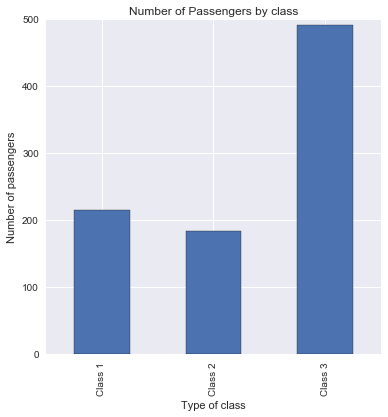

In [32]:
passengers_by_class = passengers.groupby('Pclass').size()
passengers_by_class.index = ['Class 1','Class 2','Class 3']
plot_passengers_by_class = passengers_by_class.plot(kind='bar', title = 'Number of Passengers by class', figsize= PLOT_DIM)
plot_passengers_by_class.set_xlabel("Type of class")
plot_passengers_by_class.set_ylabel("Number of passengers")

+ 2.2. How much average Ticket fare for each class? And what is the other characteristics for each class?

In [17]:
 passengers.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


**conclusion** : We can know that the ticket of class 1 is 4 times more than class 2 anad 6 times more than class 1 

+ 2.3. What is the age range of passenger in Titanic?

It is very interesting to know the age range of people. If we want to build another Titanic, we will know that who will be the next customers.

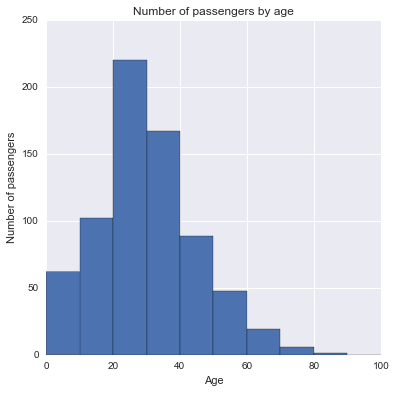

In [36]:
hist_passengers =  passengers["Age"].hist(bins=[0, 10, 20, 30,40,50,60,70,80,90,100], figsize= PLOT_DIM)
hist_passengers.set_title("Number of passengers by age")
hist_passengers.set_xlabel("Age")
hist_passengers.set_ylabel("Number of passengers")

+ 2.4. Which Port of Embarkation has the most passengers 

It will be good if we can know what is the popular port that the passengers likes with the same reason as previous topic. If we want to build another Titanic, we will know which port to target to increase the sale

Cherbourg      168
Queenstown      77
Southampton    644
dtype: int64


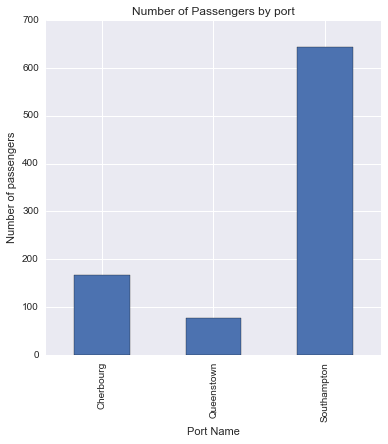

In [35]:
passengers_by_port = passengers.groupby('Embarked').size()
passengers_by_port.index = ['Cherbourg','Queenstown','Southampton']
print passengers_by_port
plot_passengers_by_port = passengers_by_port.plot(kind='bar', title = 'Number of Passengers by port', figsize= PLOT_DIM)
plot_passengers_by_port.set_xlabel("Port Name")
plot_passengers_by_port.set_ylabel("Number of passengers")

# Task 3 - Share your finding 

### 3.1. Characteristics of survivors
* Survivors seems to be younger than non-survivors.

⋅⋅* Average age of Survivors = 30.626179
⋅⋅* Average age of Non-Survivors = 28.343690
* Less survivors than non-survivors 

⋅⋅* Number of Survivors = 290.000000
⋅⋅* Number of Non-Survivors = 424

* Class 1 has more chance of survive, then class 2 and class 3 

⋅⋅* Survive rate of class 1 = 0.629630

⋅⋅* Survive rate of class 2 = 0.472826

⋅⋅* Survive rate of class 3 = 0.242363

* Female has more chance of survive than male

⋅⋅* Survive rate of female = 0.742038

⋅⋅* Survive rate of male = 0.188908

### 3.2. General Information

* Class 3 is the most popular, then class 1 and then class 2 

* The number of passengers for each port 

--* Cherbourg = 168; 

--* Queenstown = 77; 

--* Southampton = 644
